In [1]:
#Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the File
Cardata = pd.read_excel("/content/drive/MyDrive/Data is good/Internship - Un Messenger/Week 6 Model Selection/car data.xlsx")

In [3]:
#Checking the data
Cardata

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Wagon R,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,City,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,Brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,City,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,City,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#Creating a copy of data so original data stays
Car = Cardata.copy()

In [5]:
#Checking the data types and other features of dataset
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#Checking the basic statistics
Car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#Checking the statistics of non numerical columns
Car.describe(include = 'object')

,Car Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,City,Petrol,Dealer,Manual
freq,26,239,195,261


In [8]:
#Checking the unique value counts of non numerical columns
#Value counts for Year column

Cardata['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [9]:
#Checking the value counts for Fuel Type Column
Car['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
#Checking the value counts for Seller Type column
Car['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
#Checking the value counts for Transmissin column
Car['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
#Dropping the column Owner as it has no purpose
Car.drop(['Owner'],axis = 1, inplace = True)

In [13]:
#Checking the unique value counts of numerical columns

#Checking the value counts for Selling_Price Column

Car['Selling_Price'].value_counts()


0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

In [14]:
#Checking the value counts for Present Price Column

Car['Present_Price'].value_counts()

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: Present_Price, Length: 147, dtype: int64

In [15]:
#Checking the value counts for Kms_Driven Column

Car['Kms_Driven'].value_counts()

45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: Kms_Driven, Length: 206, dtype: int64

**Some Visualisation to understand the data**

In [16]:
#Importing Plotly graphs
import plotly.express as plx

In [17]:
#Checking the Average Present Price against Fuel Type
Fuel_PresentPrice = Car.groupby(['Fuel_Type'])['Present_Price'].mean().reset_index()
Fuel_PresentPrice
plx.bar(Fuel_PresentPrice, x = 'Fuel_Type',y = 'Present_Price')

In [18]:
#Checking the Average Selling Price against Fuel Type
Fuel_SellingPrice = Car.groupby(['Fuel_Type'])['Selling_Price'].mean().reset_index()
Fuel_SellingPrice
plx.bar(Fuel_SellingPrice, x = 'Fuel_Type',y = 'Selling_Price')

In [19]:
#Checking the average Selling Price against Seller Type
SellerVsSellingPrice = Car.groupby(['Seller_Type'])['Selling_Price'].mean().reset_index()
SellerVsSellingPrice
plx.bar(SellerVsSellingPrice,x = 'Seller_Type',y = 'Selling_Price')


In [20]:
#Checking the average Selling Price against Transmission
TransmissionVsSellingPrice = Car.groupby(['Transmission'])['Selling_Price'].mean().reset_index()
TransmissionVsSellingPrice
plx.bar(TransmissionVsSellingPrice,x = 'Transmission',y = 'Selling_Price')

In [21]:
#Checking the average Selling Price against Year
YearVsSellingPrice = Car.groupby(['Year'])['Selling_Price'].mean().reset_index()
YearVsSellingPrice
plx.bar(YearVsSellingPrice,x = 'Year',y = 'Selling_Price')

In [22]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


**Data Pre Processing**

**As there are no null values we will be skipping Handling Null Values**

In [23]:
#Handling Categorical Data

from sklearn.preprocessing import LabelEncoder

In [24]:
#Applying Label Encoding
def ApplyLabelEncoder(data,col_name):
  Le=LabelEncoder()
  Car[col_name]=Le.fit_transform(Car[col_name])
  return Car

def HandleCategoricalData(Car, le_cols):
    for col in le_cols: 
        Car = ApplyLabelEncoder(Car, col)
    
    return Car

In [25]:
#Declaring the label Encoding columns
le_cols = ['Year','Fuel_Type','Seller_Type','Transmission']
Car = HandleCategoricalData(Car,le_cols)

In [26]:
Car.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,Ritz,11,3.35,5.59,27000,2,0,1
1,Sx4,10,4.75,9.54,43000,1,0,1
2,Ciaz,14,7.25,9.85,6900,2,0,1
3,Wagon R,8,2.85,4.15,5200,2,0,1
4,Swift,11,4.60,6.87,42450,1,0,1


In [27]:
from sklearn.impute import KNNImputer
import numpy as np

In [28]:
#Handling Outliers
#Declaring the numerical columns where outliers to be handled
OUTLIERS_DETECT = ['Present_Price','Kms_Driven']

def DetectOutlier_ZScore(data, col_name, numerical_cols):
    col_values = Car.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*Car.shape[0])
    plt.plot([lower_limit]*Car.shape[0])
    plt.scatter(x = [i for i in range(Car.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    print(" Fixing Outliers ")
    data.loc[idxs, col_name] = np.nan # converting outliers to nulls 
    imputer = KNNImputer()
    data.loc[:, numerical_cols] = imputer.fit_transform(data.loc[:, numerical_cols])

    plt.plot([upper_limit]*Car.shape[0])
    plt.plot([lower_limit]*Car.shape[0])
    plt.scatter(x = [i for i in range(Car.shape[0])] , y = Car.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    return Car

 Outliers Detected :  5


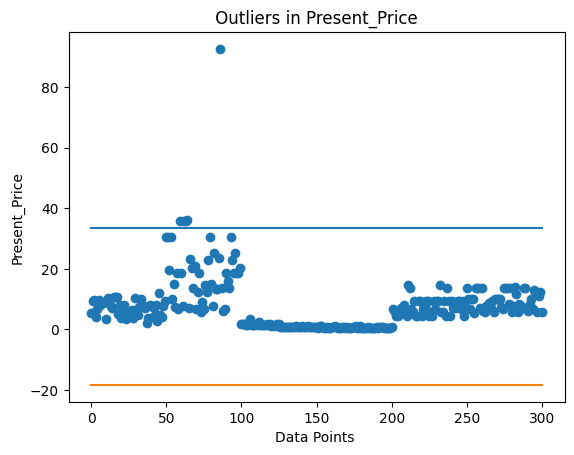

 Fixing Outliers 


<ipython-input-28-2e6b7887f50a>:26: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



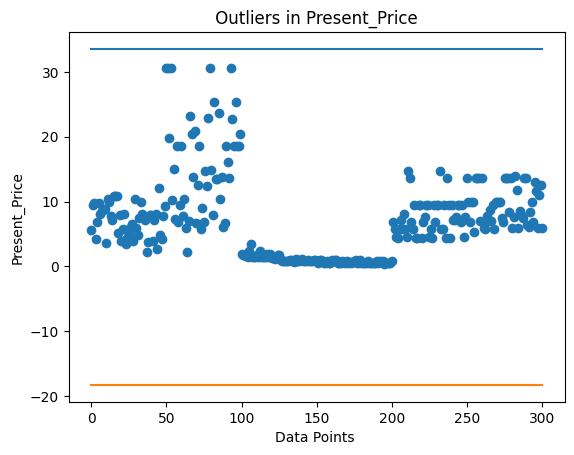

 Outliers Detected :  3


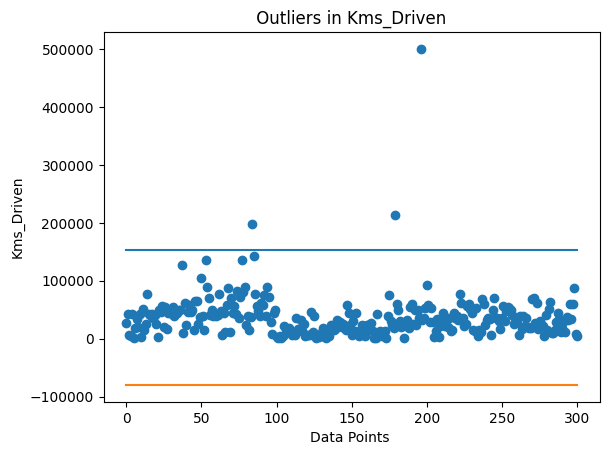

 Fixing Outliers 


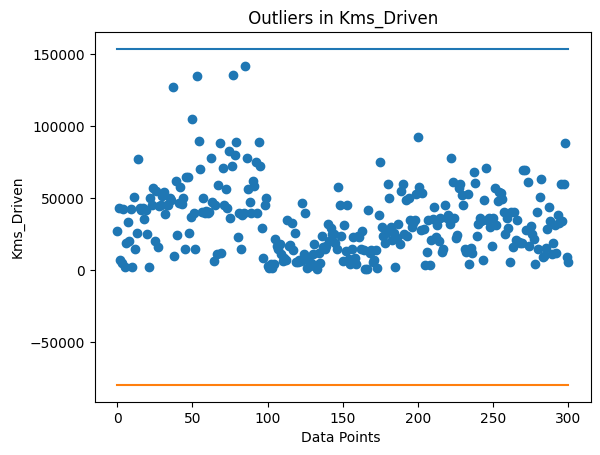

In [29]:
NUMERICAL_COLS = ['Present_Price','Kms_Driven']

for outlier_col in OUTLIERS_DETECT:
    Car = DetectOutlier_ZScore(Car, outlier_col, NUMERICAL_COLS)

In [30]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 18.9+ KB


In [31]:
#Dropping the car name column as not required in model building
Car.drop(['Car Name'],axis = 1, inplace = True)

In [32]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    float64
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 16.6 KB


In [33]:
#Checking the co relation of numerical columns having on each other
Car.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
Year,1.000000,0.236141,-0.042856,-0.611104,-0.053643,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.707929,0.129448,-0.509467,-0.550724,-0.367128
Present_Price,-0.042856,0.707929,1.000000,0.429056,-0.410551,-0.625745,-0.339004
Kms_Driven,-0.611104,0.129448,0.429056,1.000000,-0.269530,-0.266045,-0.112975
Fuel_Type,-0.053643,-0.509467,-0.410551,-0.269530,1.000000,0.352415,0.080466
Seller_Type,-0.039896,-0.550724,-0.625745,-0.266045,0.352415,1.000000,0.063240
Transmission,0.000394,-0.367128,-0.339004,-0.112975,0.080466,0.063240,1.000000


In [34]:
#Declaring the Features as x and Result as y
x = Car.drop(['Selling_Price'],axis = 1)
y = Car['Selling_Price']

In [35]:
#Importing the libraries for training, testing and also checking the r2 score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
#Splitting the data into training and Testing Dataset

xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size = 0.2,random_state = 3)

In [37]:
#Evaluating the model based on Metrics 
def MeanSquaredError(Actual, Prediction):
    return np.mean(np.square(Actual - Prediction))

def RootMeanSquaredError(Actual, Prediction):
    return np.sqrt(MeanSquaredError(Actual, Prediction))

def MeanAbsoluteError(Actual, Prediction):
    return np.mean(np.abs(Actual - Prediction))

def R2Score(Actual, Prediction):
    SSR = np.sum(np.square(Actual - Prediction))
    SSM = np.sum(np.square(Actual - np.mean(Actual)))
    return 1 - (SSR/SSM)

def PrintMetrics(Actual, Prediction):
    print(" MeanSquaredError : ", MeanSquaredError(Actual, Prediction))
    print(" RootMeanSquaredError : ", RootMeanSquaredError(Actual, Prediction))
    print(" MeanAbsolutedError : ", MeanAbsoluteError(Actual, Prediction))
    print(" R2 Score : ", R2Score(Actual, Prediction))

**Model Training**

**Start of Linear Regression**

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
ModelLinear = LinearRegression(fit_intercept=True,positive=True)
ModelLinear.fit(xtrain,ytrain)
PredictLinear = ModelLinear.predict(xtest)
PrintMetrics(ytest, PredictLinear)
Linear_score = metrics.r2_score(ytest, PredictLinear)
print(f"Linear Regression Score: {Linear_score}")

 MeanSquaredError :  3.729386209886047
 RootMeanSquaredError :  1.9311618808080402
 MeanAbsolutedError :  1.4363935688535867
 R2 Score :  0.826081249830481
Linear Regression Score: 0.826081249830481


**End of Linear Regression**

**Start of Lasso Regression**

In [40]:
from sklearn.linear_model import Lasso

In [41]:
ModelLasso = Lasso(alpha=1.0, max_iter=1000,
      positive=False, warm_start=True)
ModelLasso.fit(xtrain,ytrain)
PredictLasso = ModelLasso.predict(xtest)
PrintMetrics(ytest, PredictLasso)
Lasso_score = metrics.r2_score(ytest, PredictLasso)
print(f"Lasso Regression Score: {Lasso_score}")

 MeanSquaredError :  3.772234223365539
 RootMeanSquaredError :  1.942224040466377
 MeanAbsolutedError :  1.3318658464350934
 R2 Score :  0.8240830462301552
Lasso Regression Score: 0.8240830462301552


**End of Lasso Regression**

**Start of Ridge Regression**

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ModelRidge = Ridge(alpha=1.0, max_iter=1000,
      positive=False, tol=1,random_state = 6)
ModelRidge.fit(xtrain,ytrain)
PredictRidge = ModelRidge.predict(xtest)
PrintMetrics(ytest, PredictRidge)
Ridge_score = metrics.r2_score(ytest, PredictRidge)
print(f"Ridge Regression Score: {Ridge_score}")

 MeanSquaredError :  3.922646024796342
 RootMeanSquaredError :  1.9805670967670705
 MeanAbsolutedError :  1.4052289115035177
 R2 Score :  0.8170686392893437
Ridge Regression Score: 0.8170686392893437


**End of Ridge Regression**

**Start of Decision Tree Regression**

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
ModelDecisionTree = DecisionTreeRegressor(max_features=100, random_state=3)
ModelDecisionTree.fit(xtrain,ytrain)
PredictDecisionTree = ModelDecisionTree.predict(xtest)
PrintMetrics(ytest, PredictDecisionTree)
DecisionTree_score = metrics.r2_score(ytest, PredictDecisionTree)
print(f"Decision Tree Regression Score: {DecisionTree_score}")

 MeanSquaredError :  19.098962295081964
 RootMeanSquaredError :  4.370235954165629
 MeanAbsolutedError :  1.307704918032787
 R2 Score :  0.10932591451907636
Decision Tree Regression Score: 0.10932591451907636


**End of Decision Tree Regression**

**Start of Bagging Tree Regression**

In [46]:
from sklearn.ensemble import BaggingRegressor

In [47]:
ModelBagging = BaggingRegressor(n_estimators=10,random_state=3)
ModelBagging.fit(xtrain,ytrain)
PredictBagging = ModelBagging.predict(xtest)
PrintMetrics(ytest, PredictBagging)
BaggingTree_score = metrics.r2_score(ytest, PredictBagging)
print(f"Bagging Tree Regression Score: {BaggingTree_score}")

 MeanSquaredError :  5.935613655737705
 RootMeanSquaredError :  2.4363114857788
 MeanAbsolutedError :  1.0976229508196722
 R2 Score :  0.7231945284297671
Bagging Tree Regression Score: 0.7231945284297671


**End of Bagging Tree Regression**

**Start of Random Forest Regression**

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
ModelRandom = RandomForestRegressor(max_depth=8,random_state = 1)
ModelRandom.fit(xtrain,ytrain)
PredictRandom = ModelRandom.predict(xtest)
PrintMetrics(ytest, PredictRandom)
RandomForest_score = metrics.r2_score(ytest, PredictRandom)
print(f"Bagging Tree Regression Score: {RandomForest_score}")

 MeanSquaredError :  3.8006061140049137
 RootMeanSquaredError :  1.9495143277249627
 MeanAbsolutedError :  0.9623806519310508
 R2 Score :  0.8227599320547271
Bagging Tree Regression Score: 0.8227599320547271


**End of Random Forest Regression**

**Start of Gradient Boosting Regression**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
ModelGradient = GradientBoostingRegressor(max_features=3,random_state = 1)
ModelGradient.fit(xtrain,ytrain)
PredictGradient = ModelGradient.predict(xtest)
PrintMetrics(ytest, PredictGradient)
GradientScore = metrics.r2_score(ytest, PredictGradient)
print(f"Bagging Tree Regression Score: {GradientScore}")

 MeanSquaredError :  3.3859249958449467
 RootMeanSquaredError :  1.8400883119690061
 MeanAbsolutedError :  0.9187524532120365
 R2 Score :  0.8420984552675009
Bagging Tree Regression Score: 0.8420984552675009


**End of Gradient Boosting Regression**

**Start of Bayesian Ridge Regression**

In [52]:
from sklearn.linear_model import BayesianRidge

In [53]:
ModelBayesian = BayesianRidge(n_iter=10000,fit_intercept=True,tol=100)
ModelBayesian.fit(xtrain,ytrain)
PredictBayesian = ModelBayesian.predict(xtest)
PrintMetrics(ytest, PredictBayesian)
BayesianScore = metrics.r2_score(ytest, PredictBayesian)
print(f"Bagging Tree Regression Score: {BayesianScore}")

 MeanSquaredError :  3.7919953123853127
 RootMeanSquaredError :  1.9473046275262924
 MeanAbsolutedError :  1.395647882080212
 R2 Score :  0.8231614940736107
Bagging Tree Regression Score: 0.8231614940736107


**End of Bayesian Ridge Regression**

In [54]:
#Creating a list of each Regression model and collecting the values as R2 score achieved
Result = [['Linear Regression', Linear_score], ['Lasso Regression', Lasso_score], ['Ridge Regression', Ridge_score], ['Decision Trees', DecisionTree_score],['Bagging Trees',BaggingTree_score],['Random Forest',RandomForest_score],['Gradient Boosting',GradientScore],['Bayesian Ridge',BayesianScore]]
#Converting the list into dataframe
RegressionResult = pd.DataFrame(Result, columns=['Regression Model', 'R2 Score'])

In [55]:
#Printing the Result
RegressionResult

,Regression Model,R2 Score
0,Linear Regression,0.826081
1,Lasso Regression,0.824083
2,Ridge Regression,0.817069
3,Decision Trees,0.109326
4,Bagging Trees,0.723195
5,Random Forest,0.822760
6,Gradient Boosting,0.842098
7,Bayesian Ridge,0.823161


In [56]:
#Plotting the result of Regression model vs R2 score on Plotly
plx.bar(RegressionResult,x = 'Regression Model',y = 'R2 Score')

**Conclusion: As per the above graph we can safely asume that Gradient Boosting Regression Model is best for Prediction and Decision Tree algorithm is most over fitting model**